In [14]:
# Exercise 1 Numpy Basics
'''
1. Import the NumPy library and alias it as np.
2. Create a NumPy array of average monthly temperatures (in Celsius) for a
city, using any 12 values of your choice.
3. Calculate the mean, median, and standard deviation of the temperatures.
4. Identify which months have temperatures above the annual average.
5. Resize the array into a 2D array representing 4 quarters with 3 months
each and calculate the average temperature for each quarter.
'''

import numpy as np

tempArray = np.array([ 5, 5, 6, 8, 12, 15, 17, 16, 14, 11, 6, 5 ])
print (f'monthly temperatures for 2023 in Leicester is:  {tempArray}')





meanTemp = np.mean(tempArray)
print (f'\nthe mean temperature is: {meanTemp}')

medianTemp = np.median(tempArray)
print (f'\nthe median temperature is: {medianTemp}')

standardDevTemp = np.std(tempArray)
print (f'\nthe standard deviation is: {standardDevTemp}')

tempAboveMean = tempArray[tempArray > meanTemp]
print (f'\nthe temperatures above the mean annual average are: {tempAboveMean}')

tempAboveMedian = tempArray[tempArray > medianTemp]
print (f'\nthe temperatures above the median annual average are: {tempAboveMedian}')


# reshape the array into a 2D array, to split into quarterly temperatures
quartersArray = tempArray.reshape((4, 3))
print('\n\n\nThe temperatures split into four quarters:\n', quartersArray)
quarterMeans = np.mean(quartersArray, axis=1)
print ('\nthe average mean temperature for each quarter:\n', quarterMeans)
quarterMedian = np.median(quartersArray, axis=1)
print('\nthe average median temperature for each quarter:\n', quarterMedian)


monthly temperatures for 2023 in Leicester is:  [ 5  5  6  8 12 15 17 16 14 11  6  5]

the mean temperature is: 10.0

the median temperature is: 9.5

the standard deviation is: 4.4907311951024935

the temperatures above the mean annual average are: [12 15 17 16 14 11]

the temperatures above the median annual average are: [12 15 17 16 14 11]



The temperatures split into four quarters:
 [[ 5  5  6]
 [ 8 12 15]
 [17 16 14]
 [11  6  5]]

the average mean temperature for each quarter:
 [ 5.33333333 11.66666667 15.66666667  7.33333333]

the average median temperature for each quarter:
 [ 5. 12. 16.  6.]


In [36]:
# Exercise 2: DataFrames and Data Manipulation

'''
1. Import the pandas library and alias it as pd.
2. Create a DataFrame transactions with the following columns: OrderID,
ProductCategory, Quantity, and TransactionDate. Populate it with
sample data of your choice.
3. Write a function to filter transactions for a specific product category.
4. Add a new column TotalCost to the DataFrame, assuming each product
has a fixed price (define a price for each category).
5. Group the data by ProductCategory and calculate the total quantity sold
and total sales for each category.
'''

import pandas as pd


def filter_transactions_by_category(transactions_df, category):
    filtered_transactions = transactions_df[transactions_df['ProductCategory'] == category]
    return filtered_transactions


data = {
    'OrderID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ProductCategory': ['Electronics', 'Clothing', 'Books', 'Toys', 'Groceries', 'Tupperware', 'Food&Drink', 'DIY', 'Furniture', 'Car'],
    'Quantity': [2, 3, 1, 5, 4, 2, 6, 4, 1, 0],
    'TransactionDate': ['2024-02-08', '2024-02-08', '2024-02-07', '2024-02-06', '2024-02-05', '2024-02-01', '2024-02-05', '2024-02-05', '2024-02-07', '2024-02-08'],
    'CostPerUnit': [10, 5, 2, 2, 1.5, 2, 1, 3, 6, 12],
}

transactions = pd.DataFrame(data)

transactions['TotalCost'] = transactions.apply(lambda row: row['Quantity'] * row['CostPerUnit'], axis=1)

print("Original Transactions DataFrame:")
print(transactions)
print("\n")

category_filter_name = 'DIY' # this is where you will input the chose category

filtered_transactions = filter_transactions_by_category(transactions, category_filter_name)

print(f"Filtered Transactions DataFrame for '{category_filter_name}' Category:")
print(filtered_transactions)



Original Transactions DataFrame:
   OrderID ProductCategory  Quantity TransactionDate  CostPerUnit  TotalCost
0        1     Electronics         2      2024-02-08         10.0       20.0
1        2        Clothing         3      2024-02-08          5.0       15.0
2        3           Books         1      2024-02-07          2.0        2.0
3        4            Toys         5      2024-02-06          2.0       10.0
4        5       Groceries         4      2024-02-05          1.5        6.0
5        6      Tupperware         2      2024-02-01          2.0        4.0
6        7      Food&Drink         6      2024-02-05          1.0        6.0
7        8             DIY         4      2024-02-05          3.0       12.0
8        9       Furniture         1      2024-02-07          6.0        6.0
9       10             Car         0      2024-02-08         12.0        0.0


Filtered Transactions DataFrame for 'DIY' Category:
   OrderID ProductCategory  Quantity TransactionDate  CostPerUnit 

In [29]:
# Exercise 4: Advanced NumPy Operations

'''
Questions:
1. Create a 2D NumPy array representing an image, with random values
between 0 (no vegetation) and 1 (maximum vegetation).
2. Apply a threshold to create a binary mask where values above 0.5
represent areas with high vegetation density.
3. Calculate the percentage of the area covered by high vegetation.
4. Perform a convolution operation on the original array with a 3x3 kernel to
simulate image blurring.
5. Identify areas with a sudden change in vegetation density, hinting at
potential deforestation or reforestation, by finding the difference between
the original and blurred images.
'''

import numpy as np
from scipy.ndimage import convolve

# Set a random seed for reproducibility
np.random.seed(42)

rows, columns = 5, 5

image_array = np.random.rand(rows, columns)

threshold = 0.5

high_veg_density = image_array >= threshold

percentage_high_veg = (np.sum(high_veg_density) / (rows * columns)) * 100

print("Vegetation:")
print(image_array)
print("")

print("High vegetation density areas:")
print(high_veg_density)
print("")

print(f"Percentage of area covered by high vegetation: {percentage_high_veg:.2f}%\n")

# Define a 3x3 blurring kernel
kernel = np.ones((3, 3)) / 9  # Normalizing the kernel for averaging

# Perform convolution to simulate image blurring
blurred_image = convolve(image_array, kernel, mode='constant', cval=0.0)

change_in_density = np.abs(image_array - blurred_image)

print("Blurred Image (after convolution):")
print(blurred_image)

print("\nChange in Vegetation Density:")
print(change_in_density)

Vegetation:
[[0.37454012 0.95071431 0.73199394 0.59865848 0.15601864]
 [0.15599452 0.05808361 0.86617615 0.60111501 0.70807258]
 [0.02058449 0.96990985 0.83244264 0.21233911 0.18182497]
 [0.18340451 0.30424224 0.52475643 0.43194502 0.29122914]
 [0.61185289 0.13949386 0.29214465 0.36636184 0.45606998]]

High vegetation density areas:
[[False  True  True  True False]
 [False False  True  True  True]
 [False  True  True False False]
 [False False  True False False]
 [ True False False False False]]

Percentage of area covered by high vegetation: 40.00%

Blurred Image (after convolution):
[[0.17103695 0.34861141 0.42297128 0.40689276 0.2293183 ]
 [0.28109188 0.55115996 0.6468259  0.54318239 0.27311431]
 [0.18802436 0.43506605 0.53344556 0.51665567 0.26961398]
 [0.24772087 0.43098129 0.45262618 0.39879042 0.21553001]
 [0.13766595 0.22843273 0.22877156 0.26250079 0.171734  ]]

Change in Vegetation Density:
[[0.20350317 0.6021029  0.30902266 0.19176573 0.07329966]
 [0.12509736 0.49307635 0.21

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


            sepal_length  sepal_width
species                              
setosa             5.006        3.428
versicolor         5.936        2.770
virginica          6.588        2.974




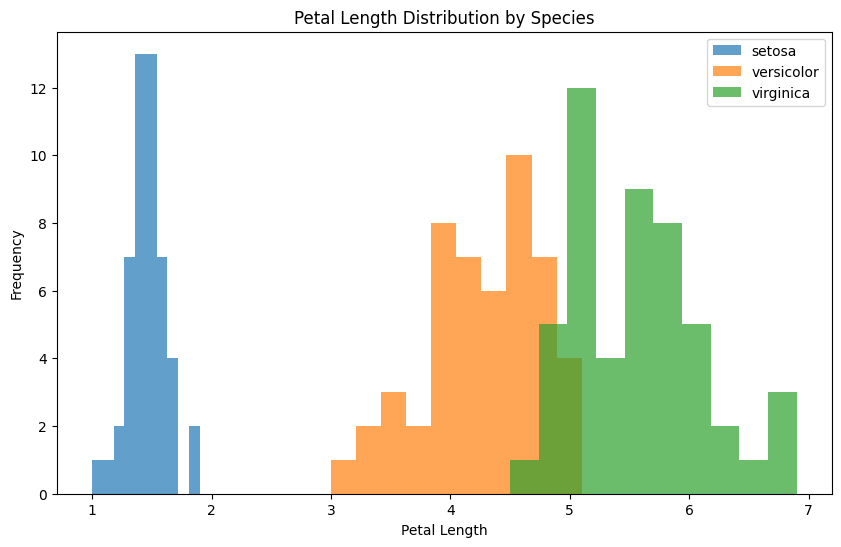

In [33]:
# Exercise 5: Exploring the Iris Dataset with Pandas and Matplotlib

'''
Questions:
1. Load the Iris dataset from seaborn (which comes pre-installed with
Anaconda) using seaborn.load_dataset('iris').
2. Display the first 5 rows of the dataset to understand its structure.
3. Calculate the mean sepal length and width for each species.
4. Create a new column SepalArea by multiplying the sepal length with the
sepal width.
5. Use Matplotlib to plot a histogram of the petal lengths for each species in
the same figure for comparison.
'''
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset('iris')

# Display the first 5 rows
print(iris.head())

# Calculate the mean sepal length and width for each species
mean_dimensions = iris.groupby('species').mean()[['sepal_length','sepal_width']]
print(f"\n\n{mean_dimensions}\n\n")

# Create a new column 'SepalArea'
iris['SepalArea'] = iris['sepal_length'] * iris['sepal_width']

# Histogram of petal lengths
plt.figure(figsize=(10, 6))
for species in iris['species'].unique(): 
    subset = iris[iris['species'] == species]
    plt.hist(subset['petal_length'], alpha=0.7, label=species)
plt.legend()
plt.title('Petal Length Distribution by Species')
plt.xlabel('Petal Length')
plt.ylabel('Frequency')
plt.show()


Overall Survival Rate: 38.38%
class   sex   
First   female    0.968085
        male      0.368852
Second  female    0.921053
        male      0.157407
Third   female    0.500000
        male      0.135447
Name: survived, dtype: float64


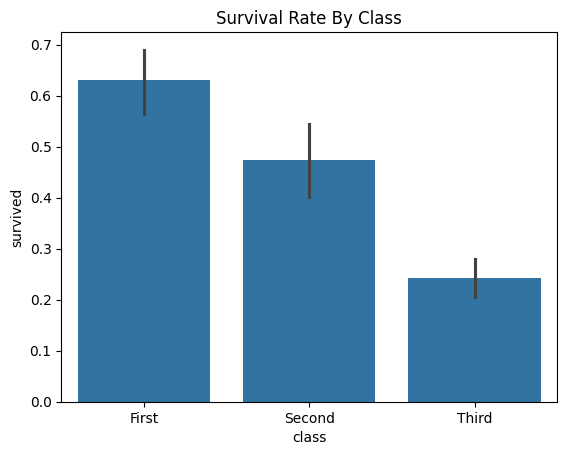

AgeGroup
Child     0.579710
Teen      0.381818
Adult     0.369565
Senior    0.227273
Name: survived, dtype: float64


In [48]:
# Exercise 6: Analyzing Titanic Survival Data with Pandas

'''
Questions:
1. Load the Titanic dataset using seaborn.load_dataset('titanic').
2. Determine the overall survival rate of passengers.
3. Group the data by class and sex to find the survival rate within each
group.
4. Create a bar plot showing the number of passengers who survived and
died, segmented by class.
5. Fill missing age values with the median age of the dataset, and then
categorize passengers into age groups (Child, Teen, Adult, Senior) and
calculate the survival rate for each group.
'''
import seaborn as sns
import matplotlib.pyplot as plt
import  pandas as pd

titanic = sns.load_dataset('titanic')

# Overall survival rate
survival_rate = titanic['survived'].mean()
print (f"Overall Survival Rate: {survival_rate:.2%}")

# Survival rate by class and sex
survival_by_group = titanic.groupby(['class','sex'])['survived'].mean()
print(survival_by_group)

# Bar plot of survival by class
sns.barplot(x = 'class', y = 'survived', data=titanic)
plt.title("Survival Rate By Class")
plt.show()

# Fill missing age values and categorize
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['AgeGroup'] = pd.cut(titanic['age'], bins=[0, 12, 20, 60, 100], labels=['Child', 'Teen', 'Adult', 'Senior'])
age_group_survival = titanic.groupby('AgeGroup')['survived'].mean()
print(age_group_survival)